In [1]:
#import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("E:\Desktop\Machine-Learning-Collection\Data Folder\study_data.csv")
data = data[:50]

In [3]:
data.head(20)

,repetition_time,study_time,knowledge_level
0,0.00,0.00,Low
1,0.24,0.90,High
2,0.25,0.33,Low
3,0.65,0.30,High
4,0.98,0.24,Low
5,0.10,0.66,High
6,0.29,0.56,High
7,0.40,0.01,Low
8,0.72,0.25,Low
9,0.20,0.85,High


In [8]:
#splitting
data

,repetition_time,study_time
0,0.00,0.00
1,0.24,0.90
2,0.25,0.33
3,0.65,0.30
4,0.98,0.24
5,0.10,0.66
6,0.29,0.56
7,0.40,0.01
8,0.72,0.25
9,0.20,0.85


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   repetition_time  50 non-null     float64
 1   study_time       50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [10]:
data.describe()

,repetition_time,study_time
count,50.000000,50.000000
mean,0.389000,0.460000
std,0.250837,0.281932
min,0.000000,0.000000
25%,0.202500,0.250000
50%,0.305000,0.395000
75%,0.602500,0.667500
max,0.980000,0.900000


Text(0, 0.5, 'study_time')

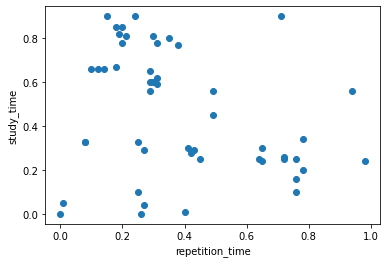

In [11]:
plt.scatter(data['repetition_time'], data['study_time'])
plt.xlabel('repetition_time')
plt.ylabel('study_time')

In [12]:
#elbow method
from sklearn import preprocessing
data_scaled = data.copy()
data_scaled = preprocessing.scale(data)
data_scaled[0:5]

array([[-1.56655021, -1.64816335],
       [-0.60004108,  1.57650408],
       [-0.55976987, -0.4657853 ],
       [ 1.05107868, -0.57327421],
       [ 2.38002873, -0.78825204]])

In [13]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 8):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(data_scaled)
  wcss.append(kmeans.inertia_)

C:\Users\aryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


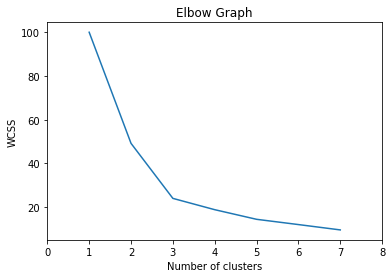

In [14]:
#plotting
plt.plot(range(1, 8), wcss)
plt.xlim( 0, 8)  
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

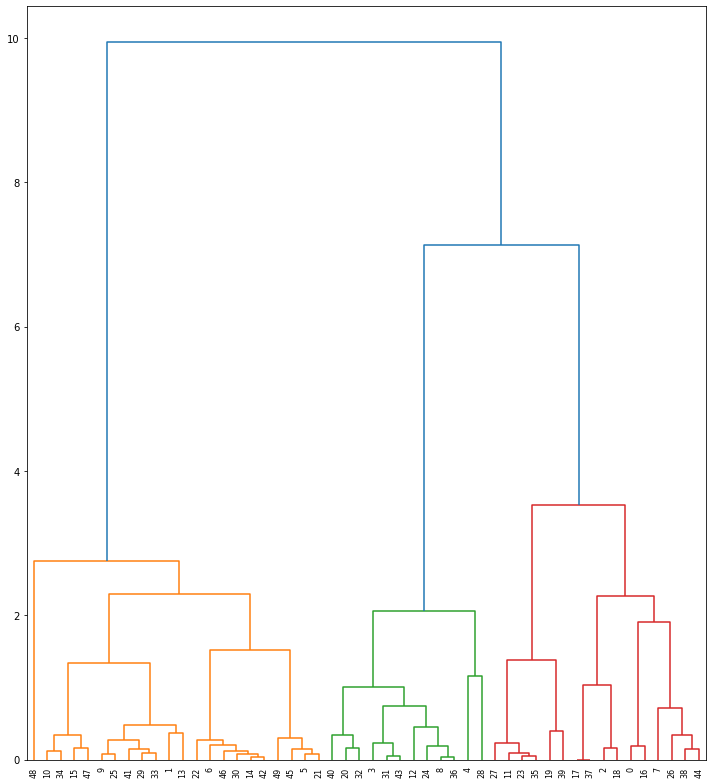

In [15]:
#denogram
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data_scaled,method="ward")

fig, ax = plt.subplots(figsize=(10, 11))
ax = dendrogram(Z)
plt.tight_layout()
plt.show()

In [16]:
#training Agglomerative Clustering model 
from sklearn.cluster import AgglomerativeClustering
ag_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
ag_cluster.fit(data_scaled)




cluster_data= data.copy()
cluster_data['cluster_pred'] = ag_cluster.fit_predict(data_scaled)



In [17]:
ag_cluster.labels_
n_clusters_ = len(np.unique(ag_cluster.labels_))
n_clusters_
cluster_data

,repetition_time,study_time,cluster_pred
0,0.00,0.00,0
1,0.24,0.90,1
2,0.25,0.33,0
3,0.65,0.30,2
4,0.98,0.24,2
5,0.10,0.66,1
6,0.29,0.56,1
7,0.40,0.01,0
8,0.72,0.25,2
9,0.20,0.85,1


Text(0, 0.5, 'study_time')

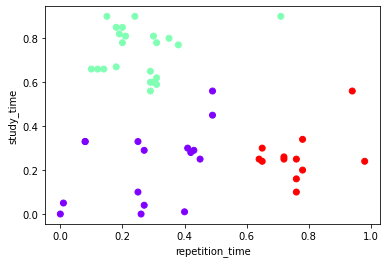

In [18]:
#visualisation
plt.scatter(data['repetition_time'], data['study_time'], c = cluster_data['cluster_pred'], cmap='rainbow')
plt.xlabel('repetition_time')
plt.ylabel('study_time')